In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Suicide Mortality Estimation Using Data Mining Techniques

Among the most serious public health problems we face is suicide.There are an estimated 800,000 people taking their own lives every year, according to the World Health Organization (WHO). That's one person every 40 seconds, and it's estimated that there are many more people who attempt suicide every year.

Globally, suicide is one of the leading causes of death among 15-29-year-olds and was the second leading cause of death in 2016.

Using Machine Learning algorithms, this notebook aims to estimate the suicide rates in various countries around the world and analyze these data to identify correlated factors responsible for the increase in suicide rates.

This notebook illustrates the following steps in detail:

 1. Data loading

 2. Analyzing data

 3. Data visualization

 4. Exploratory Data Analysis & Pre-processing

 5. Data splitting

 6. Model Training

 7. Benchmarking models

 8. Statistical Tests

 9. Conclusion

In [2]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from scipy import stats

## 1. Data loading
The dataset used in this study is sourced from WHO, **{ENTER DATASET LINK FROM WHO}**. This is a compiled dataset pulled from four other datasets linked by time and place from year 1985 to 2016. The source of those datasets are WHO, World Bank, UNDP and a dataset published in Kaggle.

In terms of a high level overview of this dataset, it contains 27820 samples with 12 different features. 

In [3]:
#Loading data
suicide_data = pd.read_csv("/content/drive/My Drive/Data_240_Project/suicide_data.csv")
suicide_data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


## 2. Familiarizing with Data:
In this step, we shall look into the data and its features.

In [4]:
#Shape of dataframe

suicide_data.shape
print(f"The dataset consists of {suicide_data.shape[0]} rows and {suicide_data.shape[1]} columns.")

The dataset consists of 27820 rows and 12 columns.


In [5]:
#Listing the features 

print("The features in the dataset are: \n")
print("\n".join(suicide_data.columns.tolist()))

The features in the dataset are: 

country
year
sex
age
suicides_no
population
suicides/100k pop
country-year
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation


In [6]:
#Changing column names for ease of use

suicide_data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
print("\n".join(suicide_data.columns.tolist()))

country
year
gender
age_group
suicide_count
population
suicide_rate
country-year
HDI for year
gdp_for_year
gdp_per_capita
generation


In [7]:
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
suicide_data.age_group.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [9]:
suicide_data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

#### Observations:


*   HDI column has lots of missing values. There are no missing values in any other column. HDI can be ignored.

*   Six unique age groups are available.

*   Age is grouped into year buckets as categorical format which needs to be encoded.

*   Encode gender.

*   Numeric features need to be scaled.

*   Six generations exist in the generation feature.

*   Generation could be encoded as well.




## 3. Data visualization:
Data distribution and feature relationships are shown by plots and graphs.

In [10]:
#data.hist(bins = 50,figsize = (15,11))

<ipython-input-11-ea22aba7aac3>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(suicide_data.corr(), annot=True, cmap='seismic')


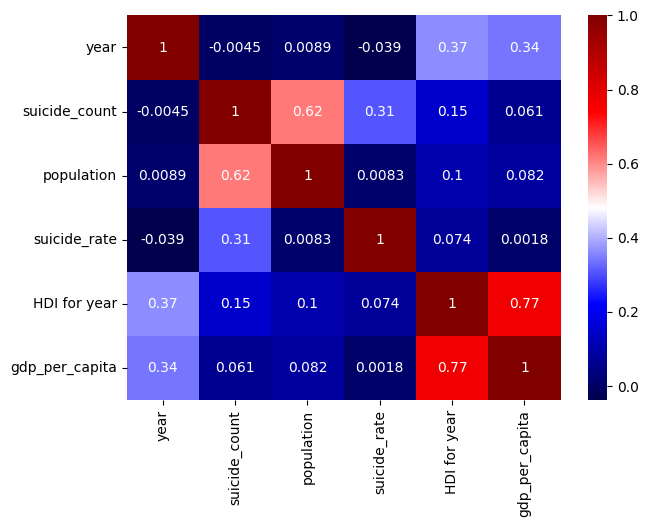

In [11]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(suicide_data.corr(), annot=True, cmap='seismic')
plt.show()

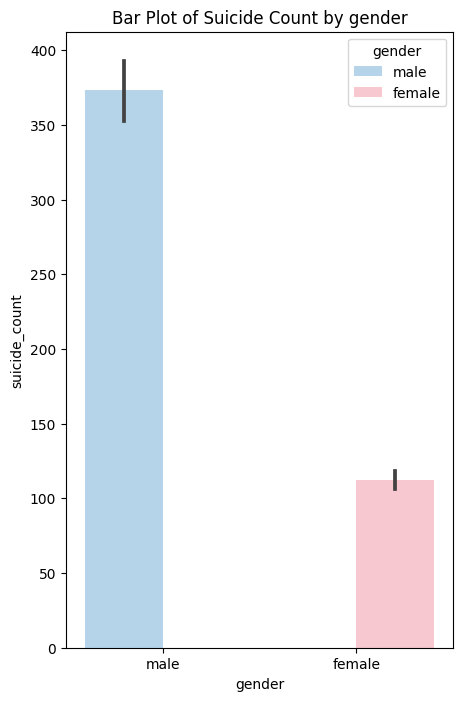

In [12]:
#Gender and suicide count bar plot

#Define a custom color palette with light blue and darker pink colors
colors = sns.color_palette(["#AED6F1", "#FFC0CB"])

#Set the palette colors for male and female bars
palette = {"male": colors[0], "female": colors[1]}

plt.figure(figsize=(5,8))
sns.barplot(x = "gender", y = "suicide_count", hue = "gender", data = suicide_data, palette=palette)
plt.title('Bar Plot of Suicide Count by gender')
plt.show()

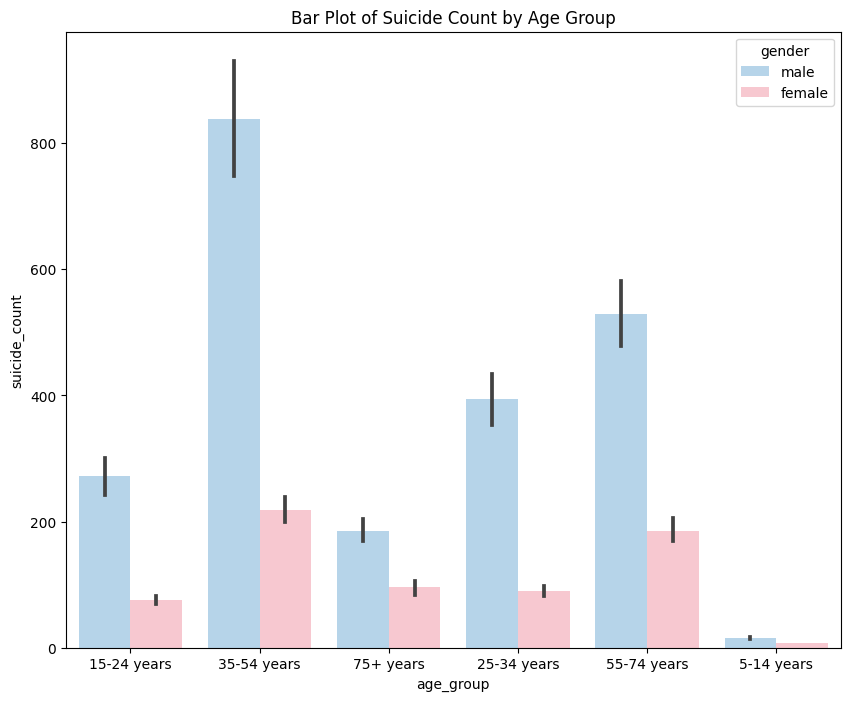

In [13]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,8))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = suicide_data, palette=palette)
plt.title("Bar Plot of Suicide Count by Age Group")
plt.show()

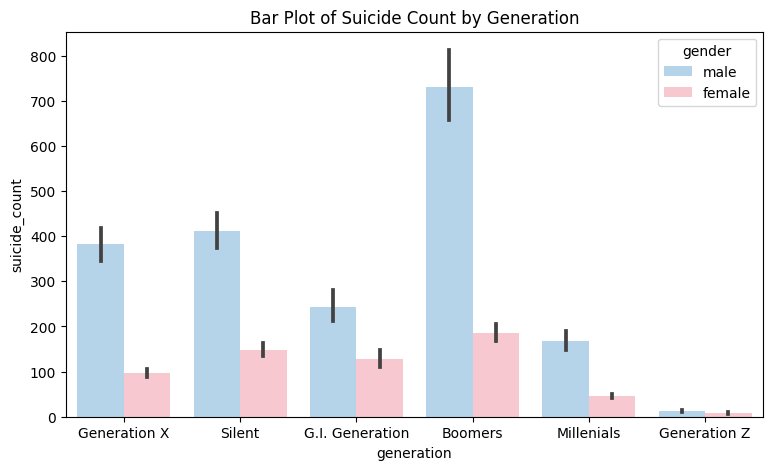

In [14]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = suicide_data, palette=palette)
plt.title('Bar Plot of Suicide Count by Generation')
plt.show()

From the above two bar plots, men commit suicide significantly more often than women regardless of their age and generation.

Now, lets check the suicide cases based on the age group.

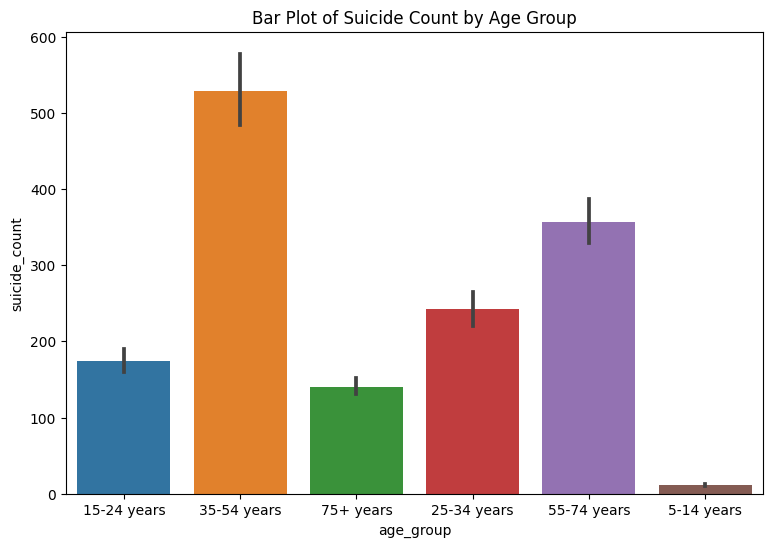

In [15]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,6))
sns.barplot(x='age_group', y='suicide_count', data = suicide_data)
plt.title('Bar Plot of Suicide Count by Age Group')
plt.show()

According to the barplot above, suicides are more prevalent among people aged 35 to 54, followed by those aged 55 to 74. However, it is surprising that there are suicides in the 5-14 year age group, even though the number of suicides is very small.

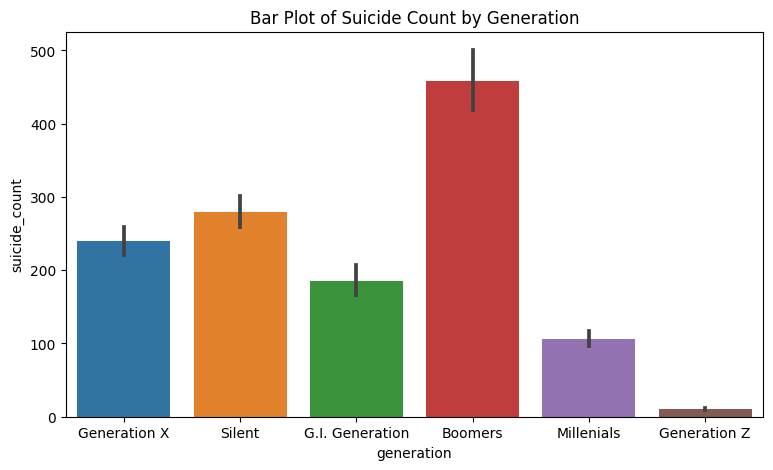

In [16]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x='generation', y='suicide_count',data=suicide_data)
plt.title('Bar Plot of Suicide Count by Generation')
plt.show()

As shown in the barplot above, suicide rates in the boomer, silent, and X generations are higher than the rest of the population. 

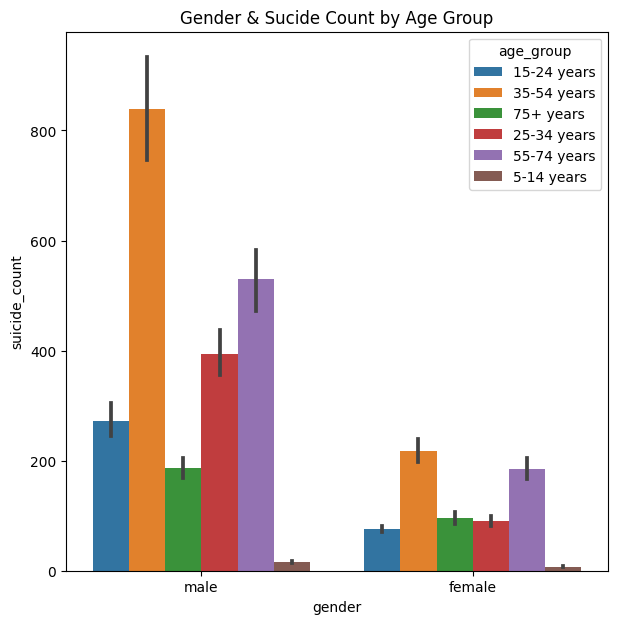

In [17]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="age_group", data=suicide_data)
plt.title('Gender & Sucide Count by Age Group')
plt.show()

1. Observing the above graph, it is evident that those aged 35-54 are more likely to commit suicide irrespective of their gender, followed by those aged 55-74.

2. Clearly, males commit suicide more often than females.

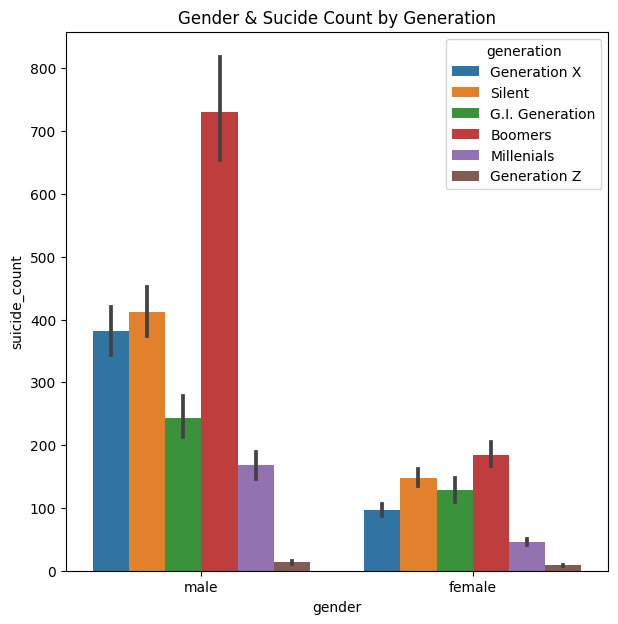

In [18]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="generation", data=suicide_data)
plt.title('Gender & Sucide Count by Generation')
plt.show()

Generationally, Boomers had a larger number of suicide cases than Silents, regardless of gender.

Suicide rates are higher among males regardless of generation.

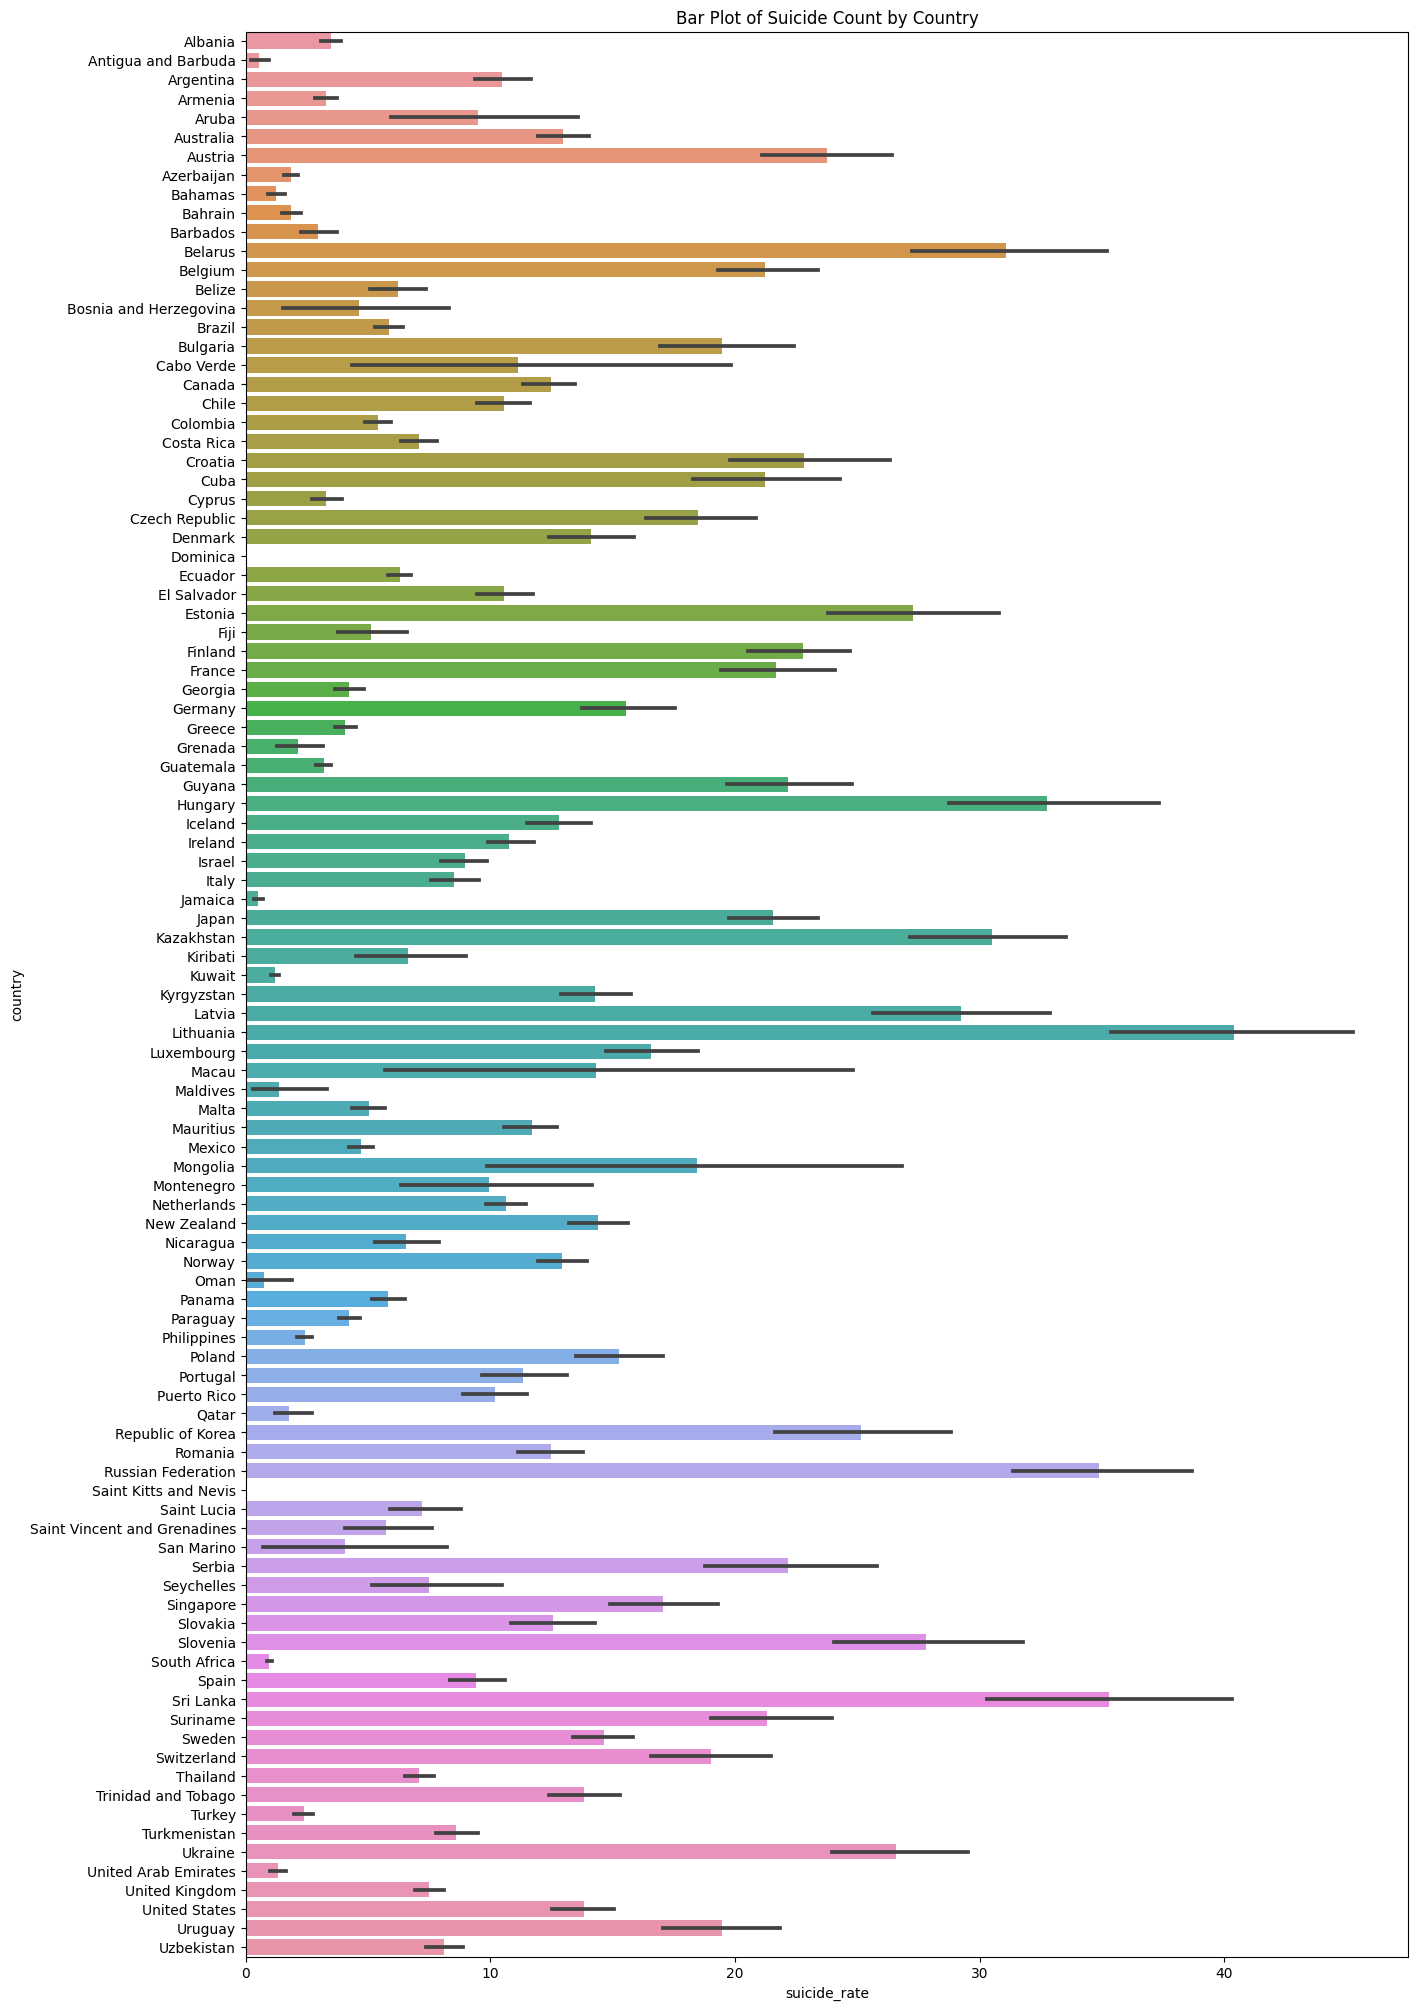

In [19]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = suicide_data)
plt.title('Bar Plot of Suicide Count by Country')
plt.show()

The above bar plot shows that the highest suicide rate country is Lithuania followed by Sri Lanka.

<Axes: xlabel='year'>

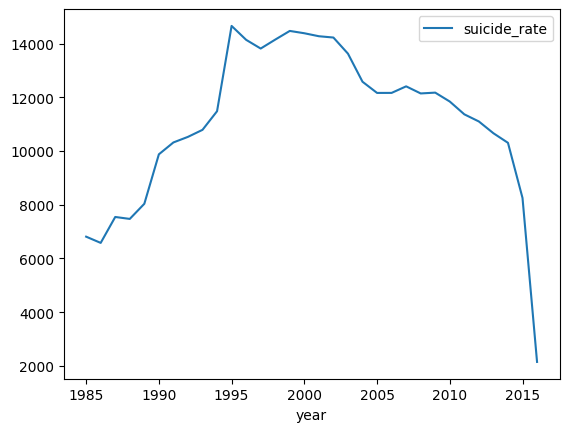

In [20]:
#Line plpot of year and suicide_rate

suicide_data[['year','suicide_rate']].groupby(['year']).sum().plot()

As can be seen from the above plot, there has been rapid growth in the suicide rate since 1990, while the suicide rate has significantly decreased since 2016 (the dataset was collected in early 2016. The dataset does not include all suicide cases in 2016).

<Figure size 2000x1000 with 0 Axes>

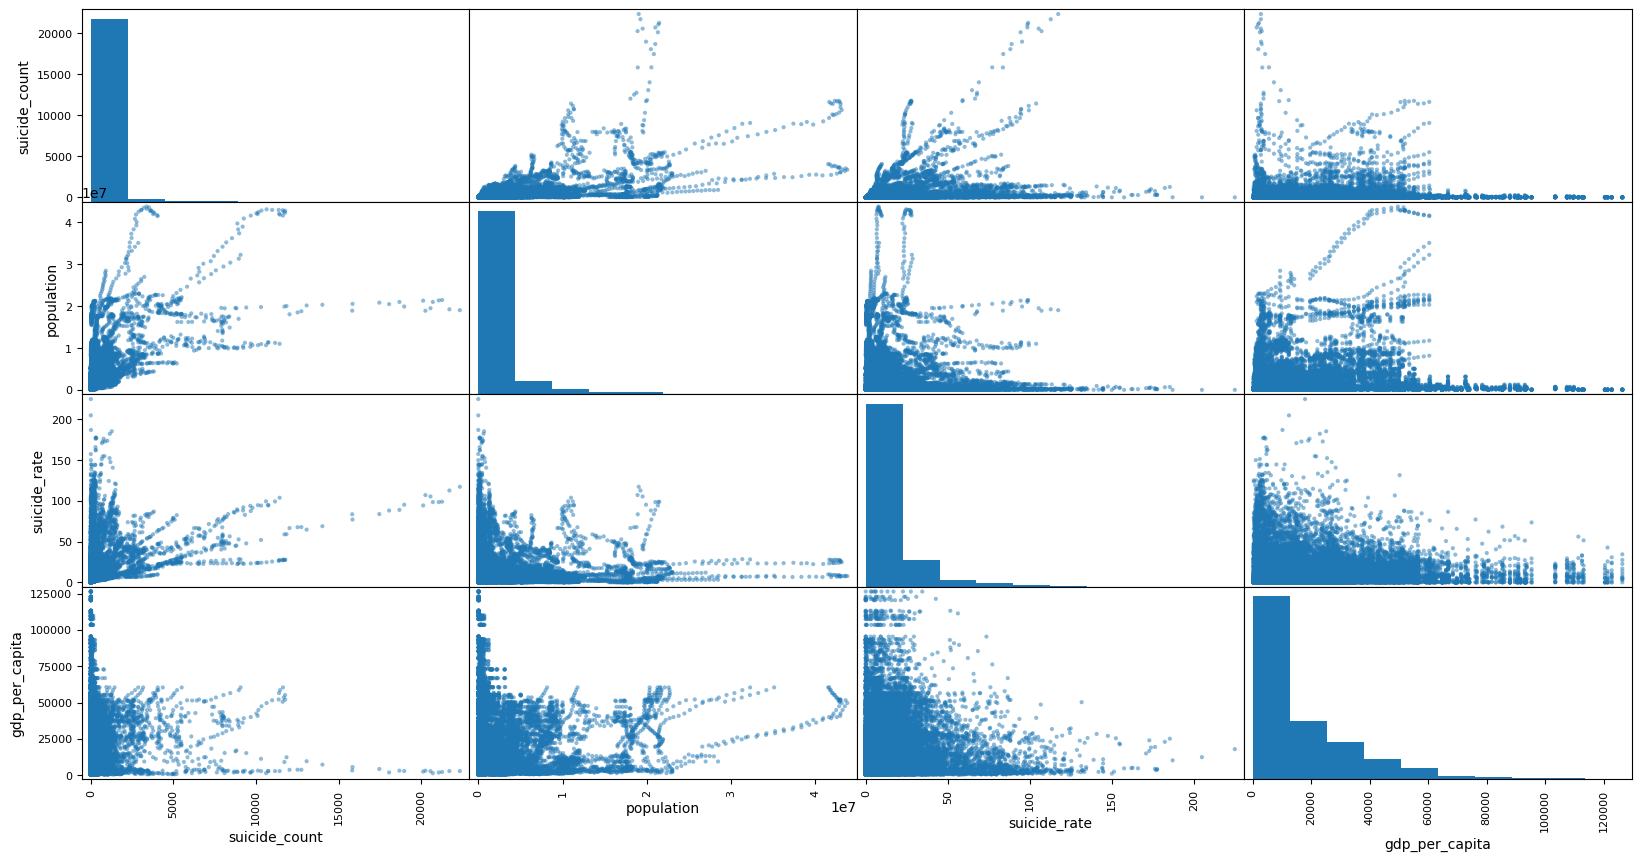

In [21]:
#Scatter matrix to view outliers

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate', 'gdp_for_year','gdp_per_capita']
scatter_matrix(suicide_data[attributes], figsize=(20,10))
plt.show()

## 4. Exploratory Data Analysis & Pre-processing:
Using data preprocessing techniques, we clean and transform the data to use for modeling

In [22]:
suicide_data.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [23]:
#checking the data for unique values

suicide_data.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_count      2084
population        25564
suicide_rate       5298
country-year       2321
HDI for year        305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [24]:
#checking the data for null or missing values

suicide_data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

The above statistics indicate that out of 27820 samples, 19456 have null values, which represents approximately 70% of the column. Therefore, the HDI for year column should be removed from the dataset since it may affect model performance.

In [25]:
#dropping the HDI for year column

suicide_data = suicide_data.drop(['HDI for year'], axis = 1)
suicide_data.shape

(27820, 11)

The column country-year combines the columns country and year. This column can be dropped.

In [26]:
#dropping the country-year for year column

suicide_data = suicide_data.drop(['country-year'], axis = 1)
suicide_data.shape

(27820, 10)

We are currently working on a set of 10 features, which also includes the target column. We intend to remove all null rows from the dataset for better model performance.

In [27]:
#dropping any null rows (if any)

suicide_data = suicide_data.dropna()
suicide_data.shape

(27820, 10)

In [28]:
print("The updated column list of the dataset is: \n")
print("\n".join(suicide_data.columns.tolist()))

The updated column list of the dataset is: 

country
year
gender
age_group
suicide_count
population
suicide_rate
gdp_for_year
gdp_per_capita
generation


We can see that there are no rows with null values.

In [29]:
#checking for outlier and removing it

suicide_data=suicide_data.sort_values(by=["suicide_rate"])
q1=suicide_data["suicide_rate"].quantile(0.25)
q3=suicide_data["suicide_rate"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
suicide_data=suicide_data[(suicide_data.suicide_rate<upo)&(suicide_data.suicide_rate>lwo)]
suicide_data=suicide_data.sort_index().reset_index(drop=True)
suicide_data.shape

(25774, 10)

Removing outliers in order to improve model performance

In [30]:
#creating a copy of dataset for statistical test
test_data = suicide_data.copy()
test_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
25769,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
25770,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
25771,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
25772,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


Using SkLearn's LabelEncoder, we can convert the non-numerical labeled columns country, year, gender, age_group, and generation into numerical labels.

In [31]:
#using LabelEncoder to encode categorical features

file = open('/content/drive/My Drive/Data_240_Project/label.pkl', 'wb')
categorical = ['country','year','age_group', 'gender', 'generation']
dict= {}

for column in categorical:
    le = LabelEncoder()
    le.fit(test_data[column])
    # dump information to that file
    dict[column] = le
    test_data[column] = le.transform(test_data[column])
pickle.dump(dict, file)
file.close()

In [32]:
file = open('/content/drive/My Drive/Data_240_Project/label.pkl', "rb")
label = pickle.load(file)
label

{'country': LabelEncoder(),
 'year': LabelEncoder(),
 'age_group': LabelEncoder(),
 'gender': LabelEncoder(),
 'generation': LabelEncoder()}

In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         25774 non-null  int64  
 1   year            25774 non-null  int64  
 2   gender          25774 non-null  int64  
 3   age_group       25774 non-null  int64  
 4   suicide_count   25774 non-null  int64  
 5   population      25774 non-null  int64  
 6   suicide_rate    25774 non-null  float64
 7   gdp_for_year    25774 non-null  object 
 8   gdp_per_capita  25774 non-null  int64  
 9   generation      25774 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.0+ MB


In [34]:
#changing the column 'gdp_for_year' from an object to a float

test_data['gdp_for_year'] = test_data['gdp_for_year'].str.replace(',','').astype(float)

Several machine learning estimators require standardizing datasets, they might behave badly if the features are not normally distributed. By using SkLearn's RobustScalar, the numerical columns for population, GDP per capita, and GDP_for_year are being standardized

In [35]:
#stat_data.describe().T
test_data.describe()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
count,25774.000000,25774.000000,25774.000000,25774.000000,25774.000000,2.577400e+04,25774.000000,2.577400e+04,25774.000000,25774.000000
mean,49.002367,16.309731,0.463064,2.408318,177.742260,1.854543e+06,8.547500,4.475355e+11,17108.010282,2.705207
std,29.493499,8.505488,0.498644,1.682575,593.366417,3.934928e+06,9.613651,1.477638e+12,19145.338470,1.787342
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,4.691962e+07,251.000000,0.000000
25%,23.000000,10.000000,0.000000,1.000000,2.000000,9.704875e+04,0.710000,8.680472e+09,3492.000000,1.000000
50%,47.000000,17.000000,0.000000,2.000000,20.000000,4.411165e+05,4.990000,4.811469e+10,9456.000000,2.000000
75%,74.000000,24.000000,1.000000,4.000000,105.000000,1.507493e+06,13.280000,2.620076e+11,25191.000000,4.000000
max,100.000000,31.000000,1.000000,5.000000,11767.000000,4.380521e+07,40.160000,1.812071e+13,126352.000000,5.000000


In [36]:
#using RobustScalar to scale numerical data columns

numerical = ['suicide_count', 'population', 'gdp_for_year','gdp_per_capita']
rc = RobustScaler()
test_data[numerical] = rc.fit_transform(test_data[numerical])

In [37]:
pickle.dump(rc, open('/content/drive/My Drive/Data_240_Project//robust.pkl', "wb"))

In [38]:
#sepratating & assigning features and target columns to X & y

y = test_data['suicide_rate'] #target variable
X = test_data.drop('suicide_rate',axis=1)
X.shape, y.shape

((25774, 9), (25774,))

In [39]:
test_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,0.009709,-0.090905,6.71,-0.181418,-0.399097,2
1,0,2,1,2,-0.038835,-0.094379,5.19,-0.181418,-0.399097,5
2,0,2,0,0,-0.058252,-0.107354,4.83,-0.181418,-0.399097,2
3,0,2,1,5,-0.184466,-0.297294,4.59,-0.181418,-0.399097,1
4,0,2,1,1,-0.106796,-0.118272,3.28,-0.181418,-0.399097,0
...,...,...,...,...,...,...,...,...,...,...
25769,100,29,0,2,0.844660,2.254407,2.96,0.059024,-0.329370,2
25770,100,29,0,5,-0.106796,-0.065690,2.58,0.059024,-0.329370,5
25771,100,29,1,3,0.388350,1.645610,2.17,0.059024,-0.329370,3
25772,100,29,0,3,0.233010,1.553045,1.67,0.059024,-0.329370,3


## 5. Data splitting:
The data is split into train & test sets, we're considering a 80-20 split.

In [40]:
# Splitting the dataset into train and test sets: 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((20619, 9), (5155, 9))

## 6. Model Building & Training:
Supervised machine learning is a very successful and commonly used approach to machine learning. It involves predicting an outcome or label based on a given set of features, using examples of feature-label pairs. These pairs make up the training set for building a machine learning model, with the goal of making accurate predictions for new, unseen data.

There are two main types of supervised machine learning problems: classification and regression. In the case of the data set being used in this notebook, the problem is a regression one as the prediction is a continuous or floating-point number, specifically the suicide rate. To train this dataset, several supervised machine learning regression models are being considered, such as:

1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. k-Nearest Neighbors Regression
6. Bagging Regression
7. Support Vector Regression
8. Multilayer Perceptrons

To evaluate the performance of these models, two metrics are being considered: Accuracy and Root Mean Squared Error.

In [41]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

## 6.1. Linear Regression
Linear regression, also known as ordinary least squares (OLS), is a basic and traditional linear regression technique. Its purpose is to identify the values of the parameters w and b that minimize the average squared difference between the predicted and actual regression targets, y, within the training data set.

In [42]:
# Linear regression model 
# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

#### Performance Evaluation:

In [44]:
#computing the accuracy and root mean squared error (RMSE) of the model performance
acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr = lr.score(X_train, y_train), lr.score(X_test, y_test), np.sqrt(mean_squared_error(y_train, y_train_lr)), np.sqrt(mean_squared_error(y_test, y_test_lr))

print(f"Linear Regression: Accuracy on training data: {acc_train_lr:.3f}")
print(f"Linear Regression: Accuracy on test data: {acc_test_lr:.3f}")
print(f"Linear Regression: RMSE on training data: {rmse_train_lr:.3f}")
print(f"Linear Regression: RMSE on test data: {rmse_test_lr:.3f}")


Linear Regression: Accuracy on training data: 0.284
Linear Regression: Accuracy on test data: 0.274
Linear Regression: RMSE on training data: 8.179
Linear Regression: RMSE on test data: 8.006


In [45]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Text(0.5, 1.0, 'Actual vs Predicted Training Set')

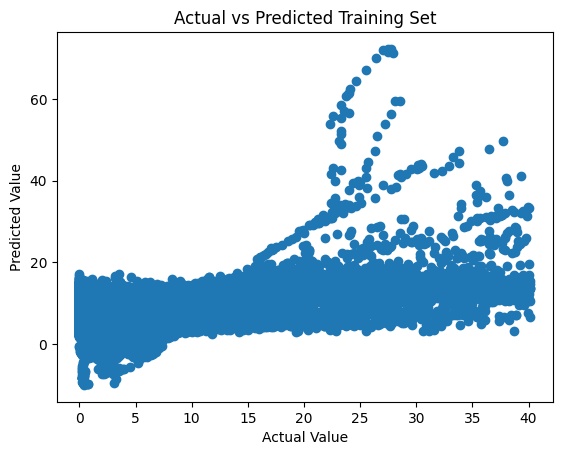

In [46]:
plt.scatter(y_train, y_train_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")

Text(0.5, 1.0, 'Actual vs Predicted Testing Set')

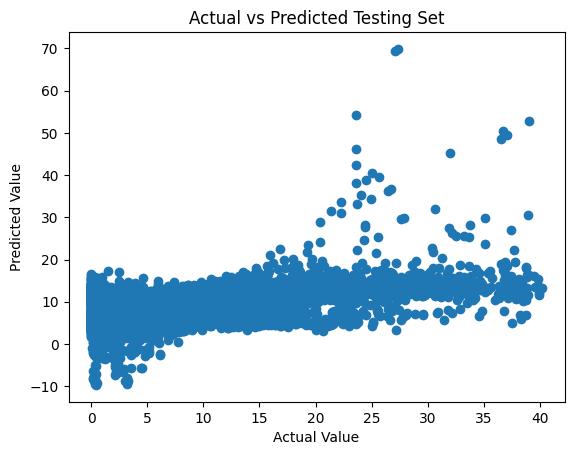

In [47]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set")

#### OBSERVATIONS: 
We can see that the scores on the training and test sets are very close, despite the not-so-ideal model performance. This means we are likely underfitting, not overfitting.



## 6.2. Decision Trees
Decision trees are widely used in classification and regression tasks in machine learning. These models make decisions based on a series of if/else questions that are designed to lead to the correct answer as quickly as possible. To create a decision tree, the algorithm tests all possible questions and selects the one that provides the most useful information about the target variable. In machine learning, these questions are called tests (not to be confused with the test set, which is the data used to evaluate the performance of the model).

In [48]:
# Decision Tree regression model 
# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [49]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

#### Performance Evaluation:

In [50]:
#computing the accuracy of the model performance
acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree = tree.score(X_train, y_train), tree.score(X_test, y_test), np.sqrt(mean_squared_error(y_train, y_train_tree)), np.sqrt(mean_squared_error(y_test, y_test_tree))

print(f"Decision Tree: Accuracy on training Data: {acc_train_tree:.3f}")
print(f"Decision Tree: Accuracy on test Data: {acc_test_tree:.3f}")
print(f"Decision Tree: The RMSE of the training set is: {rmse_train_tree:.3f}")
print(f"Decision Tree: The RMSE of the testing set is: {rmse_test_tree:.3f}")

Decision Tree: Accuracy on training Data: 0.976
Decision Tree: Accuracy on test Data: 0.969
Decision Tree: The RMSE of the training set is: 1.498
Decision Tree: The RMSE of the testing set is: 1.650


#### Storing Results:

In [51]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

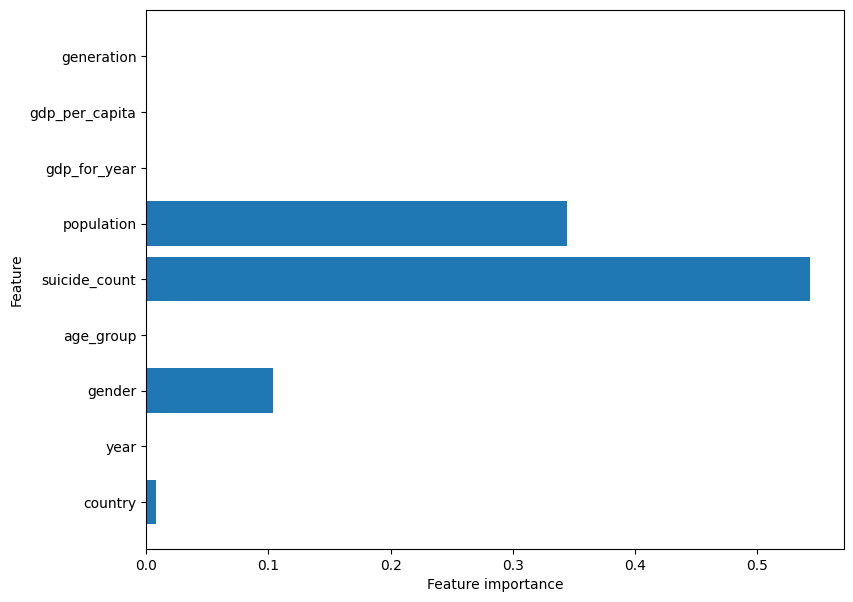

In [52]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

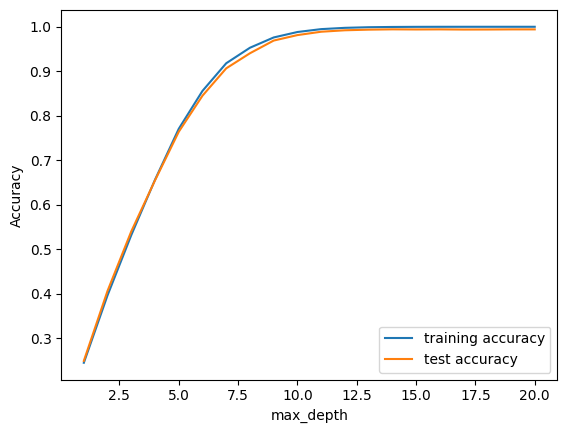

In [53]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:

Decision tree is better than other regression model as it gives 96.9% accuracy, also as max depth increases accuracy of model increases.


## 6.3. Random Forest: Ensemble of Decision Trees
Random forests are a highly popular machine learning method used for regression and classification tasks. Essentially, a random forest consists of a group of decision trees, each of which varies slightly from the others. The rationale behind using random forests is that each tree may perform well in predicting, but may overfit a portion of the data. By building many trees that overfit in different ways but work well, we can reduce overfitting by averaging their results. To create a random forest model, you must determine the number of trees to construct using the "n_estimators" parameter of the RandomForestRegressor or RandomForestClassifier. These models are very effective and often function well without significant parameter tuning or data scaling.

In [54]:
# Random Forest regression model
# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [55]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

#### Performance Evaluation:

In [56]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.991
Random Forest: Accuracy on test Data: 0.988

Random Forest: The RMSE of the training set is:  0.8948101733470382
Random Forest: The RMSE of the testing set is:  1.0368834879878845


#### Storing Results:

In [57]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

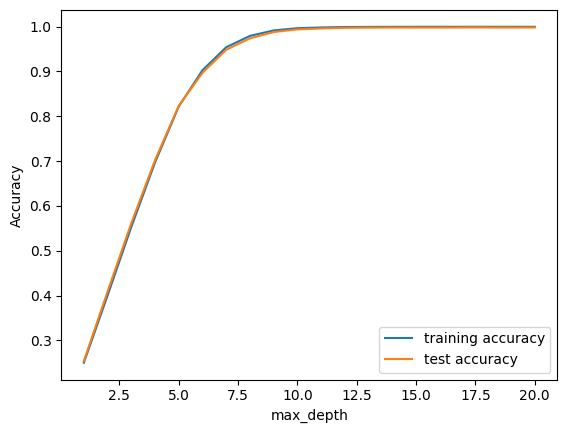

In [58]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:

The random forest gives us an accuracy of 99.2%, better than the linear models or a single decision tree, without tuning any parameters. But this might also be a case of overfitting. So, the parameter are tuned and the finalized model has an accuracy of 98% which is better than the linear & decision tree models.

## 6.4. Gradient Boosted Regression Trees (gradient boosting machines): Ensemble of Decision Trees
   The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.

In [59]:
# Gradient Boosted Regression Trees model
# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [60]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

#### Performance Evaluation:

In [61]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 0.991
Gradient Boosted Regression Trees: Accuracy on test Data: 0.988

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.9247908152749491
Gradient Boosted Regression Trees: The RMSE of the testing set is:  1.030708206712871


#### Storing Results:

In [62]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

Evaluating training and testing set performance with different numbers of learning_rate from 0.1 to 0.9. The plot shows the training and test set accuracy on the y-axis against the setting of learning_rate on the x-axis.

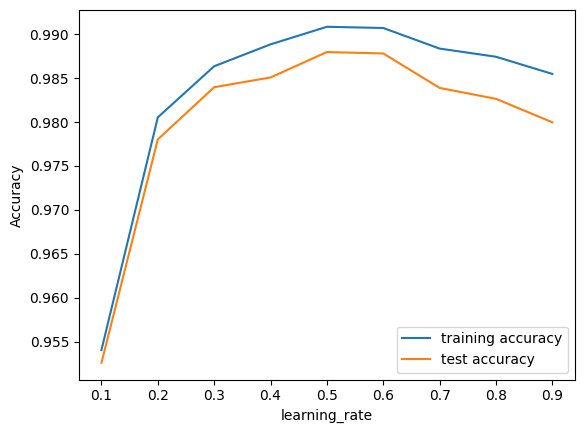

In [63]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

#### OBSERVATIONS:
The model didnt overfit when trained without tuning any parameters. The model accuracy obtained is 95.5%.

Hyper tuning is performed for Gradient Boosted Regression Tree model. The tuned parameters are learning_rate, n_estimators & max_depth. Even upon changing the n_estimators with the combination of other two, there is no change in the model performance.

So, the default value of n_estimators is taken and the other two parameters are tuned. The otimized Gradient Boosted model gives us an accuracy of 98.2%, with parameter tuning.

## 6.6. Multilayer Perceptrons (MLPs): Deep Learning
 Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

   MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [64]:
# Multilayer Perceptrons model


# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=[100, 100])

In [65]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#### Performance Evaluation:

In [66]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.942
Multilayer Perceptron Regression: Accuracy on test Data: 0.946

Multilayer Perceptron Regression: The RMSE of the training set is:  2.325102685435195
Multilayer Perceptron Regression: The RMSE of the testing set is:  2.1802326549909887


#### Storing Results:

In [67]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

#### OBSERVATIONS: 
The model didnt overfit when trained without tuning any parameters. But, the model accuracy obtained is 88.4%.

So, hyperparameter tuning is performed for the model. The tuned parameters are number of hidden layers and the hidden_units of each layer with default values of alpha. The otimized Gradient Boosted model gives us an accuracy of 90.1%, with parameter tuning.

## 7. Comparision of Models:
   To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [68]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [69]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Linear Regression,0.284,0.274,8.179,8.006
1,Decision Tree,0.976,0.969,1.498,1.650
2,Random Forest,0.991,0.988,0.895,1.037
3,Gradient Boosted Regression,0.991,0.988,0.925,1.031
4,Multilayer Perceptron Regression,0.942,0.946,2.325,2.180


In [70]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Random Forest,0.991,0.988,0.895,1.037
1,Gradient Boosted Regression,0.991,0.988,0.925,1.031
2,Decision Tree,0.976,0.969,1.498,1.650
3,Multilayer Perceptron Regression,0.942,0.946,2.325,2.180
4,Linear Regression,0.284,0.274,8.179,8.006


#### OBSERVATIONS: 
Among all the trained models, Bagging Regression performance is better. It is understandable because this model is very good in execution Speed & model performance.


### Storing best model :


## 8. Statistical Tests:
Statistical tests are used in hypothesis testing. They can be used to:

1. Determine if a predictor variable has a significant relationship with an outcome variable
2. Estimate the difference between two or more groups.

### 8.1. Test 1 aims to investigate the difference in suicide rates between male and female.
 The statistical test chosen to conduct this analysis is an independent sample t-test. The hypothesis statements for this test are:

1. Null Hypothesis (H0): There is no difference in the suicide rates among male and female.
2. Alternative Hypothesis (H1): There is a difference in the suicide rates among male and female.


In [72]:
#collecting male suicide rate data
male = test_data['suicide_rate'][test_data['gender'] == 1]
print(male.size)
male

11935


0         6.71
1         5.19
3         4.59
4         3.28
8         0.73
         ...  
25763    11.61
25765    11.33
25766    11.10
25767     7.56
25771     2.17
Name: suicide_rate, Length: 11935, dtype: float64

In [73]:
#collecting female suicide rate data
female = test_data['suicide_rate'][test_data['gender'] == 0]
print(female.size)
female

13839


2        4.83
5        2.81
6        2.15
7        1.56
9        0.00
         ... 
25768    5.92
25769    2.96
25770    2.58
25772    1.67
25773    1.46
Name: suicide_rate, Length: 13839, dtype: float64

In [74]:
#calculating p value

ttest,pval = stats.ttest_rel(male[:11900], female[:11900])

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


#### Test Conclusion: 
By performing T-test, the result obtained is to reject the null hypothesis. This basically means that there is different in suicide rates of male & female.

### 8.2. Test 2: To find out the dependence of suicide rate on the age.
Test 2 aimed to determine if there is a relationship between suicide rate and age. The Chi-Square test was used to investigate this relationship. The test had two hypothesis statements:

H0: Suicide rate and age are not related (null hypothesis).

H1: Suicide rate and age are related (alternative hypothesis).

In [75]:
#Creating Contingency Table
contingency_table = pd.crosstab(test_data.suicide_rate, test_data.age_group)

In [76]:
#Significance Level 5%
alpha=0.05

In [77]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [78]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 18257.744744487307


In [79]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 

Significance level:  0.05
Degree of Freedom:  17945
chi-square statistic: 30342.74275521654
critical_value: 18257.744744487307
p-value: 0.0


Here, pvalue = 0.0 and a low pvalue suggests that the sample 
provides enough evidence to reject H0 for entire population.

In [80]:
#compare chi_square_statistic with critical_value and p-value which is the 
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Age group & Suicide rate.")
else:
    print("Retain H0,There is no relationship between Age group & Suicide rate.")


Reject H0,There is a dependency between Age group & Suicide rate.
Reject H0,There is a dependency between Age group & Suicide rate.


#### Test Conclusion: 
After conducting a Chi-Square test, the outcome indicates that the null hypothesis should be rejected, indicating that there is a relationship between age group and suicide rate. In other words, age group and suicide rate are dependent on each other.

## 9. Conclusion:
The analysis of the suicide dataset in this project has provided valuable insights into the factors that contribute to suicide rates across different countries, age groups, and genders. The analysis has demonstrated the effectiveness of various machine learning models, including regression models, in predicting suicide rates based on a range of socio-economic variables.

One of the key takeaways from the project is that the male population is more prone to committing suicide than the female population, irrespective of age group and generation. This finding could help in the development of targeted interventions to address this issue.

Another important finding is that socio-economic factors such as GDP per capita, unemployment rates, and education levels have a significant impact on suicide rates. Governments and policymakers could use this information to develop policies and interventions that address these underlying factors to reduce suicide rates.

The analysis also highlights the importance of feature engineering and hyperparameter tuning in developing accurate machine learning models. By optimizing the parameters of the models, the project achieved impressive results in terms of prediction accuracy and root mean squared error.

Overall, this project provides a valuable contribution to the field of suicide prevention and intervention. The insights gained from this analysis could help identify individuals who are at a higher risk of suicide and develop targeted interventions to prevent such incidents.